# Project Papadias

# A. Choose a data set of a quantity whose weekly values (e.g. closing price of a stock index every Monday) over 5 years are available. Go over this data set and make sure to clean it up of any inconsistencies, outliers, missing data, etc.

## Importing Libraries

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm

## Getting the stock price data for APPLE

In [3]:
# Ticker symbol for company that we want to find (e.g., 'AAPL' for Apple Inc.)
ticker_symbol = 'AAPL'

# Time Period Interval
start_time = '2017-01-01'
end_time = '2021-12-31'

stock_data = yf.download(ticker_symbol, start=start_time, end=end_time)

csv_file_path = 'stock_data.csv'
stock_data.to_csv(csv_file_path)
print(f'Stock data has been saved to {csv_file_path}')

[*********************100%%**********************]  1 of 1 completed
Stock data has been saved to stock_data.csv


In [4]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.023708,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.993452,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.130730,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.433195,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.684465,134247600
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.288635,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.292862,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.264618,79144300


In [5]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,74.582458,75.399726,73.808724,74.646159,72.635021,1.210383e+08
std,40.551033,41.047073,40.059715,40.580124,40.606139,5.615497e+07
min,28.950001,29.082500,28.690001,29.004999,26.993452,4.100000e+07
25%,43.018750,43.368125,42.608749,43.019375,40.935192,8.375070e+07
50%,54.127501,54.834999,53.375000,53.938751,51.728481,1.062192e+08
75%,115.924374,117.275000,114.129997,115.739374,113.534906,1.410447e+08
max,181.119995,182.130005,178.529999,180.330002,178.292862,4.479400e+08


### Separating into weekly & Preprocessing/Cleaning

In [6]:
file_path = 'stock_data.csv'
stock_data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

weekly_data = stock_data.resample('W-FRI').agg({'Adj Close': 'last'})

# Check for missing values
cleaned_weekly_data = weekly_data.dropna()

# Drop duplicates
cleaned_weekly_data = weekly_data.drop_duplicates()

# Z-score for outlier detection
z_scores = np.abs(stats.zscore(cleaned_weekly_data['Adj Close']))
outlier_threshold = 3
outlier_indices = np.where(z_scores > outlier_threshold)
outliers = cleaned_weekly_data.iloc[outlier_indices]

print(f'Outliers:{outliers}')
print('\n')
print(cleaned_weekly_data.head())

#Saving to csv
csv_file_path = 'stock_data.csv'
cleaned_weekly_data.to_csv(csv_file_path)

Outliers:Empty DataFrame
Columns: [Adj Close]
Index: []


            Adj Close
Date                 
2017-01-06  27.433195
2017-01-13  27.696104
2017-01-20  27.919451
2017-01-27  28.373144
2017-02-03  30.032026


In [13]:
# Calculate each statistic for each column in the DataFrame
mean = cleaned_weekly_data.mean()
std_error = cleaned_weekly_data.sem()
median = cleaned_weekly_data.median()
# Mode might return multiple values; taking the first one for each column
mode = cleaned_weekly_data.mode().iloc[0]  
std_dev = cleaned_weekly_data.std()
sample_variance = cleaned_weekly_data.var()
kurtosis = cleaned_weekly_data.kurtosis()
skewness = cleaned_weekly_data.skew()
data_range = cleaned_weekly_data.max() - cleaned_weekly_data.min()
minimum = cleaned_weekly_data.min()
maximum = cleaned_weekly_data.max()
sum_of_data = cleaned_weekly_data.sum()
count = cleaned_weekly_data.count()

# Calculating confidence interval for each column
confidence_interval = {}
for column in cleaned_weekly_data.columns:
    conf_int = stats.norm.interval(0.95, loc=mean[column], scale=std_error[column])
    confidence_interval[column] = conf_int

# Improved print statements for clarity

print(f"Mean: {mean}")
print("Standard Error:\n", std_error)
print("\nMedian:\n", median)
print("\nMode:\n", mode)
print("\nStandard Deviation:\n", std_dev)
print("\nSample Variance:\n", sample_variance)
print("\nKurtosis:\n", kurtosis)
print("\nSkewness:\n", skewness)
print("\nRange:\n", data_range)
print("\nMinimum:\n", minimum)
print("\nMaximum:\n", maximum)
print("\nSum of Data:\n", sum_of_data)
print("\nCount:\n", count)
print("\nConfidence Interval (95%):\n", confidence_interval)

Mean: Adj Close    72.734588
dtype: float64
Standard Error:
 Adj Close    2.527993
dtype: float64

Median:
 Adj Close    51.785709
dtype: float64

Mode:
 Adj Close    27.433195
Name: 0, dtype: float64

Standard Deviation:
 Adj Close    40.840984
dtype: float64

Sample Variance:
 Adj Close    1667.985955
dtype: float64

Kurtosis:
 Adj Close   -0.725006
dtype: float64

Skewness:
 Adj Close    0.851336
dtype: float64

Range:
 Adj Close    149.989595
dtype: float64

Minimum:
 Adj Close    27.433195
dtype: float64

Maximum:
 Adj Close    177.422791
dtype: float64

Sum of Data:
 Adj Close    18983.727432
dtype: float64

Count:
 Adj Close    261
dtype: int64

Confidence Interval (95%):
 {'Adj Close': (67.77981178559786, 77.68936394046325)}


In [14]:
cleaned_weekly_data.describe()

,Adj Close
count,261.000000
mean,72.734588
std,40.840984
min,27.433195
25%,40.929260
50%,51.785709
75%,114.566650
max,177.422791


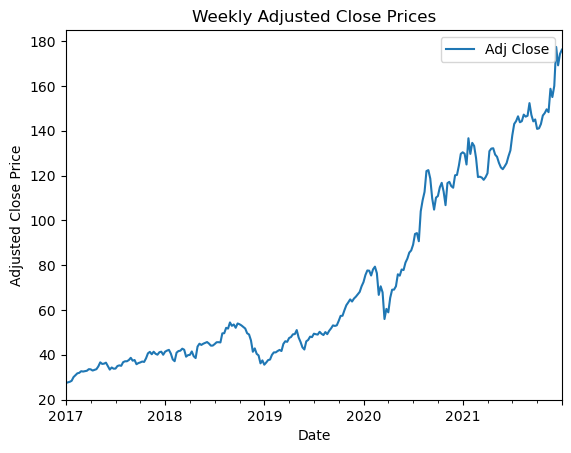

In [5]:
# Plotting the cleaned weekly data
cleaned_weekly_data.plot(title='Weekly Adjusted Close Prices')
plt.ylabel('Adjusted Close Price')
plt.show()

# B. Using the data for the first 4 years of your chosen (and cleaned up) data set, try to forecast the data of year 5. For this:

## a. Use three different forecasting techniques to perform the forecasting of level (without trend or seasonality adjustments). If a technique is parametric, try to choose the optimal value for this parameter.

## b. Compare these three techniques in two different ways.

### Naive Approach

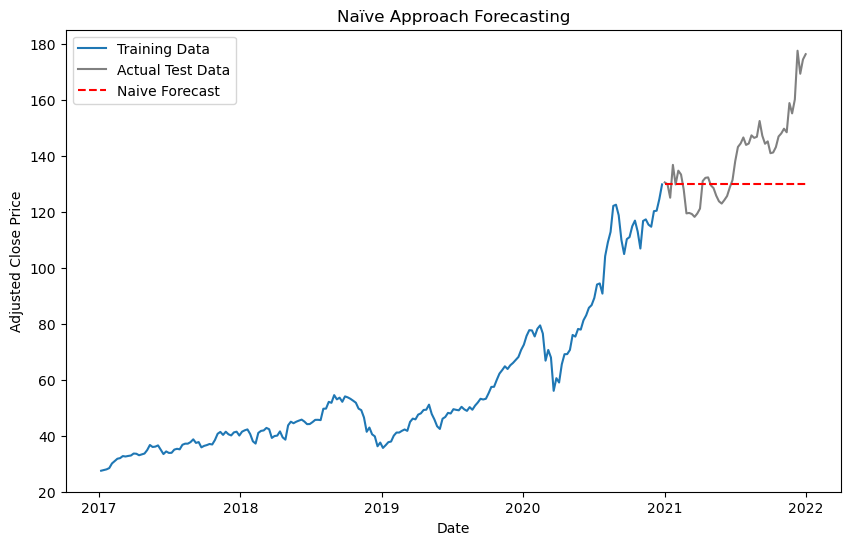

In [6]:
file_path = 'stock_data.csv'
stock_data = pd.read_csv(file_path, index_col='Date', parse_dates=True)
cleaned_weekly_data = stock_data.resample('W-FRI').agg({'Adj Close': 'last'}).dropna()

train = cleaned_weekly_data[cleaned_weekly_data.index.year < 2021]
test = cleaned_weekly_data[cleaned_weekly_data.index.year == 2021]

naive_forecast = pd.DataFrame(index=test.index,columns=['Adj Close'])
naive_forecast['Adj Close'] = np.asarray(train['Adj Close'])[-1]

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Adj Close'], label='Training Data')
plt.plot(test.index, test['Adj Close'], color='gray', label='Actual Test Data')
plt.plot(naive_forecast.index, naive_forecast['Adj Close'], color='red', linestyle='--', label='Naive Forecast')
plt.title('Naïve Approach Forecasting')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [7]:
naive_forecast = np.asarray(train['Adj Close'])[-1]
forecasted_values = np.full(len(test), naive_forecast)
mad = np.mean(np.abs(test['Adj Close'] - forecasted_values))
mape = np.mean(np.abs((test['Adj Close'] - forecasted_values) / test['Adj Close'])) * 100
rmse = np.sqrt(np.mean((test['Adj Close'] - forecasted_values) ** 2))

# Print MAD, MAPE, and RMSE
print(f'MAD: {mad:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'RMSE: {rmse:.2f}')

MAD: 13.16
MAPE: 8.84%
RMSE: 17.60


### Moving Average

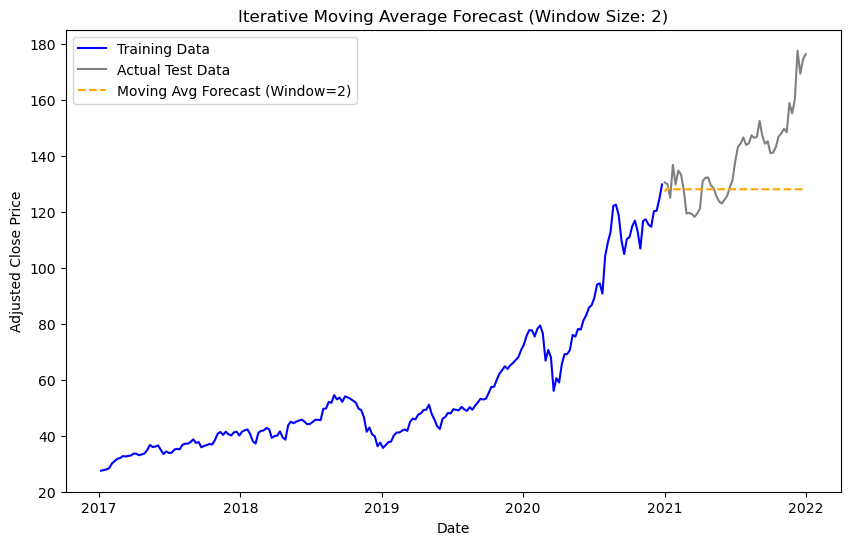

Window Size: 2
MAD: 13.94, MAPE: 9.33%, RMSE: 18.59



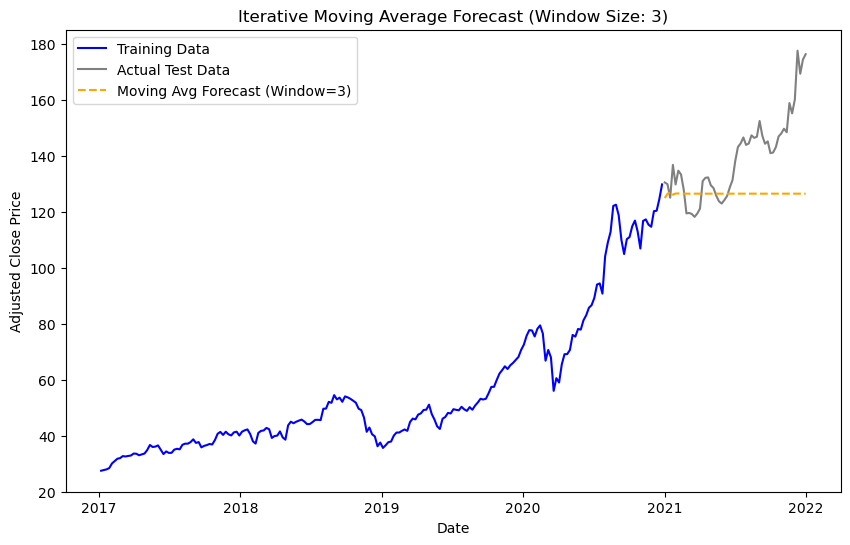

Window Size: 3
MAD: 14.84, MAPE: 9.91%, RMSE: 19.58



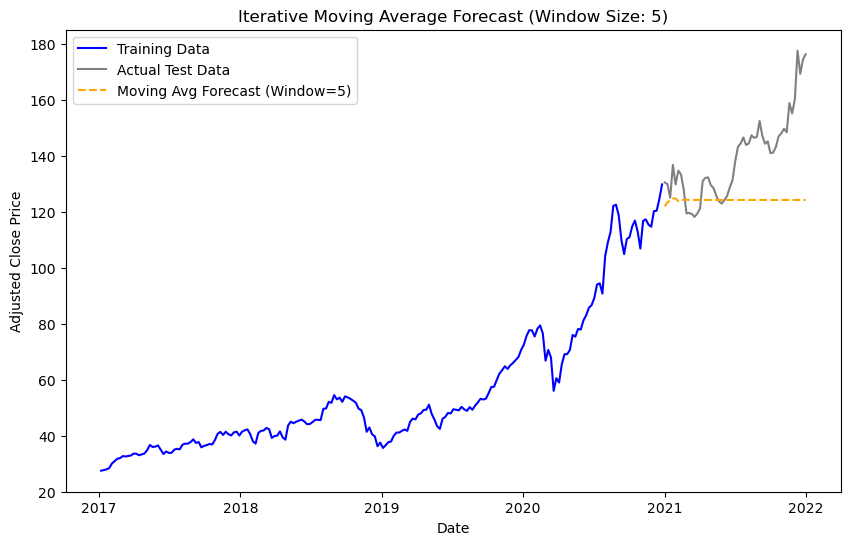

Window Size: 5
MAD: 16.22, MAPE: 10.83%, RMSE: 21.13



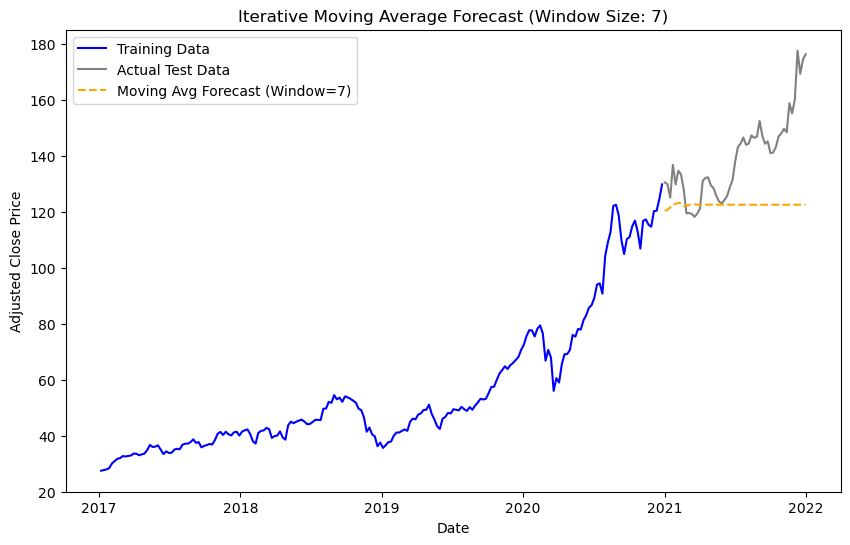

Window Size: 7
MAD: 17.48, MAPE: 11.70%, RMSE: 22.37



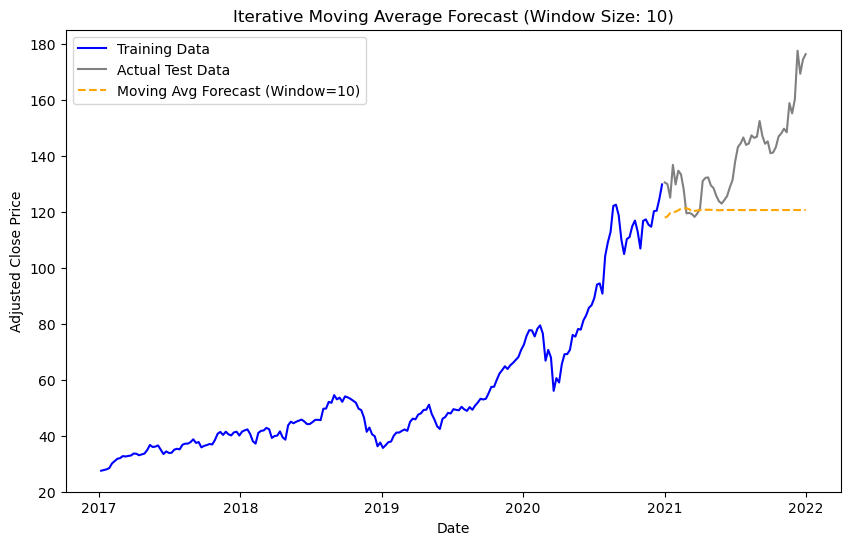

Window Size: 10
MAD: 19.01, MAPE: 12.77%, RMSE: 23.86



In [8]:
def rmse(predictions, targets):
    return np.sqrt(mean_squared_error(predictions, targets))

# List of window sizes to try
window_sizes = [2, 3, 5, 7, 10]

for window_size in window_sizes:
    forecasted_values = []
    current_values = train['Adj Close'].tolist()

    # Iteratively forecast each point in the test set
    for i in range(len(test)):
        # Calculate the moving average with the most recent values
        if len(current_values) >= window_size:
            moving_avg = np.mean(current_values[-window_size:])
        else:
            moving_avg = np.mean(current_values)

        # Append the forecasted value and update the list for next iteration
        forecasted_values.append(moving_avg)
        current_values.append(moving_avg)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train['Adj Close'], label='Training Data', color='blue')
    plt.plot(test.index, test['Adj Close'], label='Actual Test Data', color='gray')
    plt.plot(test.index, forecasted_values, linestyle='--', label=f'Moving Avg Forecast (Window={window_size})', color='orange')
    plt.title(f'Iterative Moving Average Forecast (Window Size: {window_size})')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()

    # Calculate error metrics
    mad = mean_absolute_error(test['Adj Close'], forecasted_values)
    mape = np.mean(np.abs((test['Adj Close'] - forecasted_values) / test['Adj Close'])) * 100
    calculated_rmse = rmse(test['Adj Close'], forecasted_values)

    print(f'Window Size: {window_size}')
    print(f'MAD: {mad:.2f}, MAPE: {mape:.2f}%, RMSE: {calculated_rmse:.2f}\n')


### Exponential Smoothing

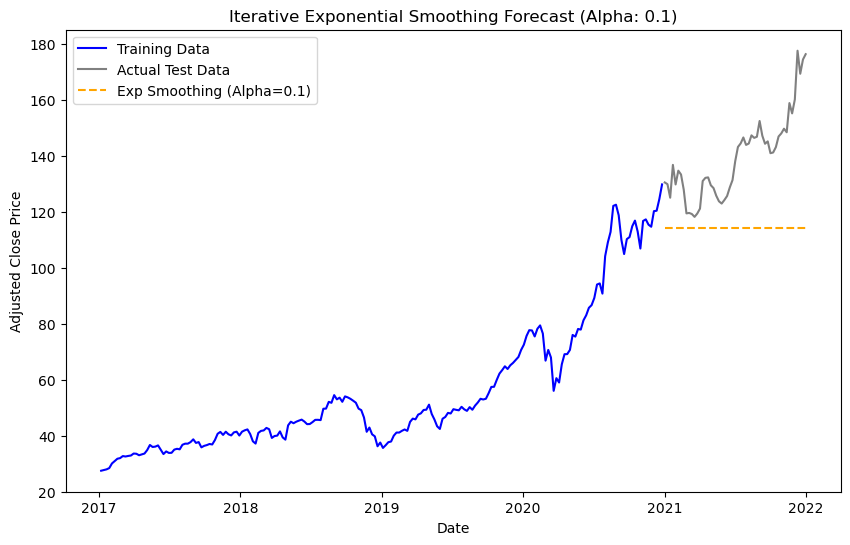

Alpha: 0.1
MAD: 25.07, MAPE: 17.13%, RMSE: 29.13



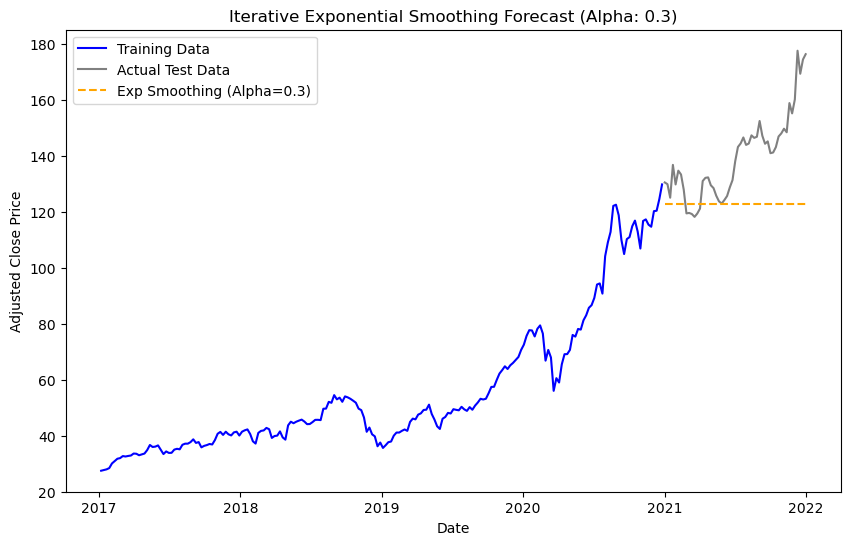

Alpha: 0.3
MAD: 17.29, MAPE: 11.56%, RMSE: 22.24



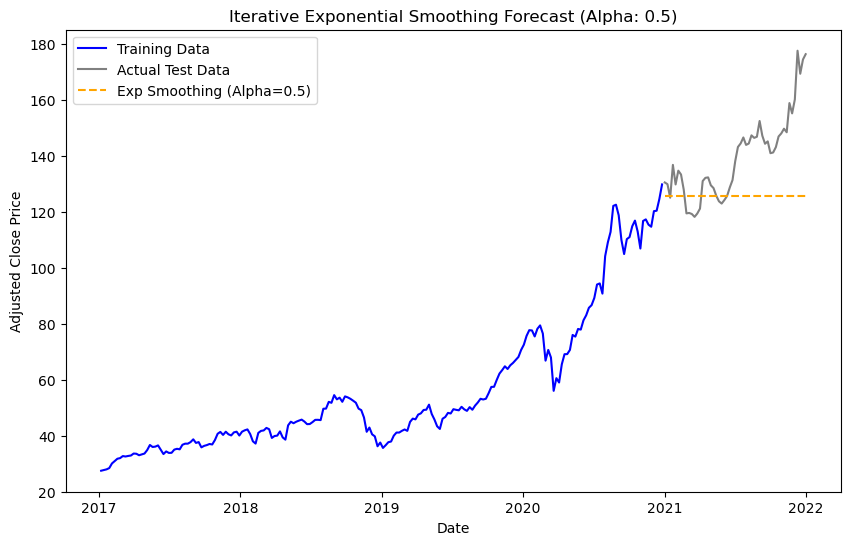

Alpha: 0.5
MAD: 15.17, MAPE: 10.12%, RMSE: 20.03



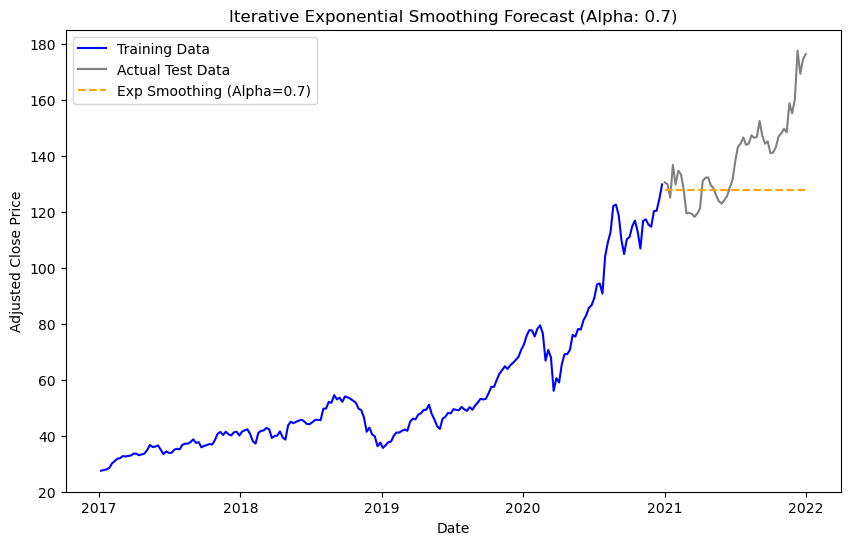

Alpha: 0.7
MAD: 14.07, MAPE: 9.41%, RMSE: 18.74



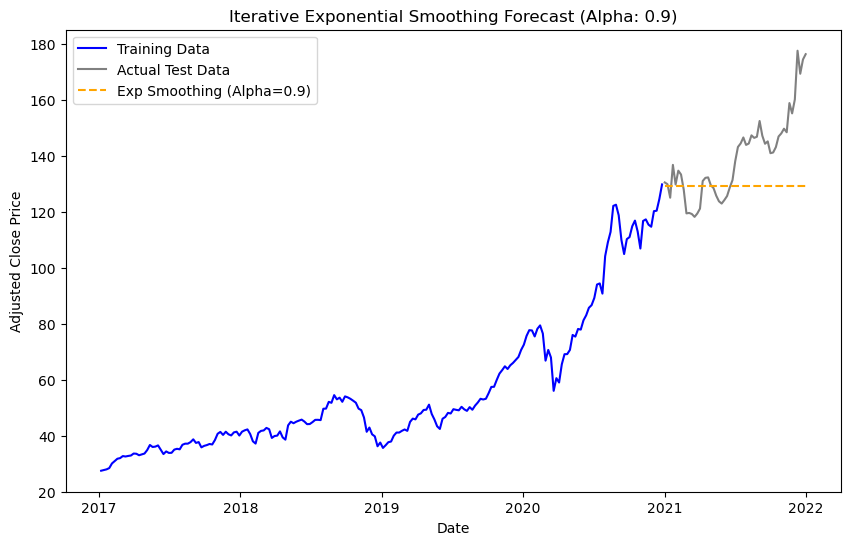

Alpha: 0.9
MAD: 13.39, MAPE: 8.98%, RMSE: 17.91



In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

alphas = [0.1, 0.3, 0.5, 0.7, 0.9]  # Different alphas to try

for alpha in alphas:
    forecasted_values = []
    current_values = train['Adj Close'].tolist()

    # Iteratively apply exponential smoothing for each point in the test set
    for i in range(len(test)):
        if i == 0:
            model = SimpleExpSmoothing(current_values).fit(smoothing_level=alpha, optimized=False)
            next_forecast = model.forecast(1)[0]
        else:
            model = SimpleExpSmoothing(current_values + forecasted_values).fit(smoothing_level=alpha, optimized=False)
            next_forecast = model.forecast(1)[0]

        forecasted_values.append(next_forecast)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train['Adj Close'], label='Training Data', color='blue')
    plt.plot(test.index, test['Adj Close'], label='Actual Test Data', color='gray')
    plt.plot(test.index, forecasted_values, linestyle='--', label=f'Exp Smoothing (Alpha={alpha})', color='orange')
    plt.title(f'Iterative Exponential Smoothing Forecast (Alpha: {alpha})')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()

    # Calculate error metrics
    mad = mean_absolute_error(test['Adj Close'], forecasted_values)
    mape = np.mean(np.abs((test['Adj Close'] - forecasted_values) / test['Adj Close'])) * 100
    calculated_rmse = rmse(test['Adj Close'], forecasted_values)

    print(f'Alpha: {alpha}')
    print(f'MAD: {mad:.2f}, MAPE: {mape:.2f}%, RMSE: {calculated_rmse:.2f}\n')


## c. Try to see if there is a trend in the first 4 years' data set, estimate it and then do a trend-adjusted forecasting for year 5.

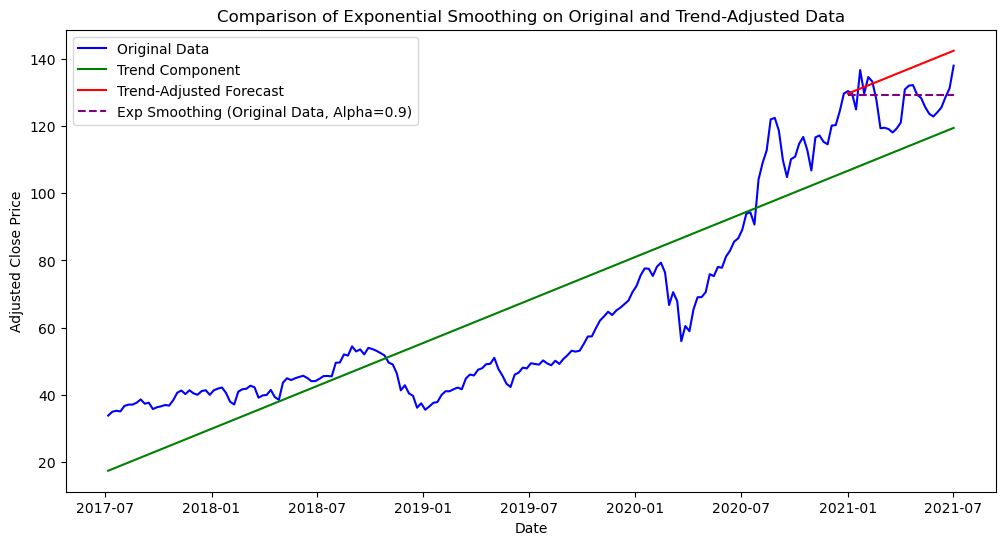

Trend-Adjusted Forecast - MAD: 9.48, MAPE: 7.62%, RMSE: 11.09


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming cleaned_weekly_data is already loaded and prepared

# Decompose the time series to extract the trend
decomposition = seasonal_decompose(cleaned_weekly_data['Adj Close'], model='additive', period=52)
trend_component = decomposition.trend.dropna()

# Find the start and end of the non-NaN trend component
start_date = trend_component.first_valid_index()
end_date = trend_component.last_valid_index()

# Trim the cleaned_weekly_data to match the trend estimation period
trimmed_data = cleaned_weekly_data.loc[start_date:end_date]

# Prepare data for Linear Regression for trend estimation
X = np.arange(len(trimmed_data)).reshape(-1, 1)
y = trend_component.loc[start_date:end_date].values

# Fit the trend model
trend_model = LinearRegression().fit(X, y)
trend_estimate = trend_model.predict(X)

# Detrend the data
detrended_data = trimmed_data['Adj Close'] - trend_estimate

# Split data into training and testing sets
train = detrended_data[:'2020-12-31']
test = detrended_data['2021-01-01':]

# Apply Exponential Smoothing to Detrended Data
alpha = 0.9  # Adjust alpha as needed
model_detrended = SimpleExpSmoothing(train.dropna()).fit(smoothing_level=alpha, optimized=False)
forecast_length = len(test)
forecast_detrended = model_detrended.forecast(forecast_length)

# Re-integrate the trend component into the forecasted values
trend_forecast = trend_estimate[-forecast_length:]
adjusted_forecast = forecast_detrended.values + trend_forecast

# Apply Exponential Smoothing to Original (Trended) Data
model_trended = SimpleExpSmoothing(trimmed_data['Adj Close'][:'2020-12-31']).fit(smoothing_level=alpha, optimized=False)
forecast_trended = model_trended.forecast(forecast_length)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(trimmed_data['Adj Close'], label='Original Data', color='blue')
plt.plot(trimmed_data.index, trend_estimate, label='Trend Component', color='green')
#plt.plot(detrended_data.index, detrended_data, label='Detrended Data', color='orange')
plt.plot(test.index, adjusted_forecast, label='Trend-Adjusted Forecast', color='red')
plt.plot(test.index, forecast_trended, linestyle='--', label=f'Exp Smoothing (Original Data, Alpha={alpha})', color='purple')  # Exponential Smoothing on Original Data
plt.title('Comparison of Exponential Smoothing on Original and Trend-Adjusted Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Calculate error metrics for the trend-adjusted forecast
mad = mean_absolute_error(test + trend_forecast, adjusted_forecast)  # Note: Adjust the test data to include the trend for MAD calculation
mape = np.mean(np.abs((test + trend_forecast - adjusted_forecast) / (test + trend_forecast))) * 100
rmse = np.sqrt(mean_squared_error(test + trend_forecast, adjusted_forecast))

print(f'Trend-Adjusted Forecast - MAD: {mad:.2f}, MAPE: {mape:.2f}%, RMSE: {rmse:.2f}')


In [11]:
# file_path = 'stock_data.csv'
# stock_data = pd.read_csv(file_path, index_col='Date', parse_dates=True)
# cleaned_weekly_data = stock_data.resample('W-FRI').agg({'Adj Close': 'last'}).dropna()
# train = cleaned_weekly_data[cleaned_weekly_data.index.year < 2021]
# test = cleaned_weekly_data[cleaned_weekly_data.index.year == 2021]

# # Detecting and estimating trend
# decomposition = sm.tsa.seasonal_decompose(train['Adj Close'], model='additive')
# trend = decomposition.trend.dropna()

# # Correcting the trend estimation
# trend_time = np.arange(len(trend))  # Representing time as a simple numerical array
# trend_slope, trend_intercept = np.polyfit(trend_time, trend.values, 1)

# # Adjusting forecasts for trend
# naive_forecast = np.asarray(train['Adj Close'])[-1]
# window_size = 3  # 52 weeks for a yearly moving average
# moving_avg_forecast = train['Adj Close'].rolling(window=window_size).mean().iloc[-1]
# exp_smooth_model = SimpleExpSmoothing(np.asarray(train['Adj Close'])).fit(smoothing_level=0.95, optimized=False)
# exp_smooth_forecast = exp_smooth_model.forecast(len(test))

# # # Instead of using just the last value, use an average of the last few values
# # recent_avg_period = 1  # for example, average of the last 4 weeks
# # naive_forecast = np.mean(train['Adj Close'][-recent_avg_period:])

# # # Adjust this forecast for the trend
# # adjusted_naive_forecast = [naive_forecast + trend_slope * (len(train) + i) for i in range(len(test))]

# # Calculate the trend value at the end of 2020
# end_of_2020_trend = trend_slope * len(train) + trend_intercept

# # Adjust the naive forecast for trend from the start of 2021
# adjusted_naive_forecast = [naive_forecast + (trend_slope * (len(train) + i) + trend_intercept - end_of_2020_trend) for i in range(len(test))]



# # Rest of your plotting code remains the same

# adjusted_moving_avg_forecast = [moving_avg_forecast + trend_slope * (len(train) + i) for i in range(len(test))]
# adjusted_exp_smooth_forecast = exp_smooth_forecast + trend_slope * np.arange(len(test))

# plt.figure(figsize=(12, 8))
# plt.plot(train.index, train['Adj Close'], label='Training Data')
# plt.plot(test.index, test['Adj Close'], color='gray', label='Actual Test Data')
# plt.plot(test.index, adjusted_naive_forecast, color='red', linestyle='--', label='Trend Adjusted Naive Forecast')


# plt.plot(test.index, adjusted_moving_avg_forecast, color='green', linestyle='--', label='Trend Adjusted Moving Average Forecast')
# plt.plot(test.index, adjusted_exp_smooth_forecast, color='purple', linestyle='--', label='Trend Adjusted Exponential Smoothing Forecast')
# plt.title('Trend Adjusted Forecasting')
# plt.xlabel('Date')
# plt.ylabel('Adjusted Close Price')
# plt.legend()
# plt.show()

In [12]:
# file_path = 'stock_data.csv'
# stock_data = pd.read_csv(file_path, index_col='Date', parse_dates=True)
# cleaned_weekly_data = stock_data.resample('W-FRI').agg({'Adj Close': 'last'}).dropna()
# train = cleaned_weekly_data[cleaned_weekly_data.index.year < 2021]
# test = cleaned_weekly_data[cleaned_weekly_data.index.year == 2021]

# # Detecting and estimating trend
# decomposition = sm.tsa.seasonal_decompose(train['Adj Close'], model='additive')
# trend = decomposition.trend.dropna()

# # Correcting the trend estimation
# trend_time = np.arange(len(trend))  # Representing time as a simple numerical array
# trend_slope, trend_intercept = np.polyfit(trend_time, trend.values, 1)

# # Adjusting forecasts for trend
# naive_forecast = np.asarray(train['Adj Close'])[-1]


# #THIS HERE TO MOVE NAIVE
# window_size = 12  # 52 weeks for a yearly moving average


# moving_avg_forecast = train['Adj Close'].rolling(window=window_size).mean().iloc[-1]
# exp_smooth_model = SimpleExpSmoothing(np.asarray(train['Adj Close'])).fit(smoothing_level=0.95, optimized=False)
# exp_smooth_forecast = exp_smooth_model.forecast(len(test))

# adjusted_naive_forecast = [naive_forecast + trend_slope * (len(train) + i) for i in range(len(test))]
# adjusted_moving_avg_forecast = [moving_avg_forecast + trend_slope * (len(train) + i) for i in range(len(test))]
# adjusted_exp_smooth_forecast = exp_smooth_forecast + trend_slope * np.arange(len(test))

# plt.figure(figsize=(12, 8))
# plt.plot(train.index, train['Adj Close'], label='Training Data')
# plt.plot(test.index, test['Adj Close'], color='gray', label='Actual Test Data')
# plt.plot(test.index, adjusted_naive_forecast, color='red', linestyle='--', label='Trend Adjusted Naive Forecast')
# plt.plot(test.index, adjusted_moving_avg_forecast, color='green', linestyle='--', label='Trend Adjusted Moving Average Forecast')
# plt.plot(test.index, adjusted_exp_smooth_forecast, color='purple', linestyle='--', label='Trend Adjusted Exponential Smoothing Forecast')
# plt.title('Trend Adjusted Forecasting')
# plt.xlabel('Date')
# plt.ylabel('Adjusted Close Price')
# plt.legend()
# plt.show()

In [13]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming 'stock_data' is already loaded and contains the required data

# # Extracting the first four years for trend analysis
# data_for_trend = stock_data[:'2020-12-31']
# data_for_trend['Time_Index'] = np.arange(len(data_for_trend))

# # Linear Regression Model
# model = LinearRegression()
# model.fit(data_for_trend[['Time_Index']], data_for_trend['Adj Close'])

# # Predicting the trend for the data_for_trend period
# data_for_trend['Trend'] = model.predict(data_for_trend[['Time_Index']])

# # Creating a date range for the forecast period (2021)
# forecast_start_date = '2021-01-01'
# forecast_end_date = '2021-12-31'
# forecasted_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W-FRI')

# # Creating a time index for the forecast period
# forecasted_time_index = np.arange(len(data_for_trend), len(data_for_trend) + len(forecasted_dates))

# # Predicting the trend for the forecast period
# forecasted_trend = model.predict(forecasted_time_index.reshape(-1, 1))

# # Creating a DataFrame for the forecasted data
# forecasted_data = pd.DataFrame({'Date': forecasted_dates, 'Forecasted': forecasted_trend})

# # Plotting the data, trend line, and forecast for 2021
# plt.figure(figsize=(12, 6))
# plt.plot(stock_data['Adj Close'][:'2020-12-31'], label='Actual Data', color='blue')
# plt.plot(data_for_trend['Trend'], color='red', linestyle='--', label='Trend Line')
# plt.plot(forecasted_data['Date'], forecasted_data['Forecasted'], color='green', linestyle='--', label='Forecast (2021)')
# plt.title('Linear Trend and Forecast for 2021 in Stock Data')
# plt.xlabel('Date')
# plt.ylabel('Adjusted Close Price')
# plt.legend()
# plt.show()

# # Calculating Metrics for the Linear Regression Model
# y_true = data_for_trend['Adj Close']
# y_pred = data_for_trend['Trend']
# r2 = r2_score(y_true, y_pred)
# mse = mean_squared_error(y_true, y_pred)
# rmse = np.sqrt(mse)

# print(f'R-squared: {r2:.4f}')
# print(f'Mean Squared Error: {mse:.4f}')
# print(f'Root Mean Squared Error: {rmse:.4f}')


## d. Then try to see if there is seasonality in the first 4 years' data, estimate the seasonality factor and then adjust your forecasting for seasonality as well.

In [14]:
# Detecting and estimating seasonality
seasonal = decomposition.seasonal.dropna()
seasonality_factor = seasonal.groupby(seasonal.index.week).mean()

# Adjust the seasonality factor for missing weeks
if 53 not in seasonality_factor.index:
    seasonality_factor[53] = seasonality_factor[52]

# Adjusting forecasts for seasonality
test_weeks = test.index.week
adjusted_naive_forecast_seasonal = [adjusted_naive_forecast[i] + seasonality_factor[test_weeks[i]] for i in range(len(test))]
adjusted_moving_avg_forecast_seasonal = [adjusted_moving_avg_forecast[i] + seasonality_factor[test_weeks[i]] for i in range(len(test))]
adjusted_exp_smooth_forecast_seasonal = adjusted_exp_smooth_forecast + seasonality_factor[test_weeks].values

plt.figure(figsize=(12, 8))
plt.plot(train.index, train['Adj Close'], label='Training Data')
plt.plot(test.index, test['Adj Close'], color='gray', label='Actual Test Data')
plt.plot(test.index, adjusted_naive_forecast_seasonal, color='red', linestyle='--', label='Seasonality Adjusted Naive Forecast')
plt.plot(test.index, adjusted_moving_avg_forecast_seasonal, color='green', linestyle='--', label='Seasonality Adjusted Moving Average Forecast')
plt.plot(test.index, adjusted_exp_smooth_forecast_seasonal, color='purple', linestyle='--', label='Seasonality Adjusted Exponential Smoothing Forecast')
plt.title('Seasonality Adjusted Forecasting')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

NameError: name 'adjusted_naive_forecast' is not defined

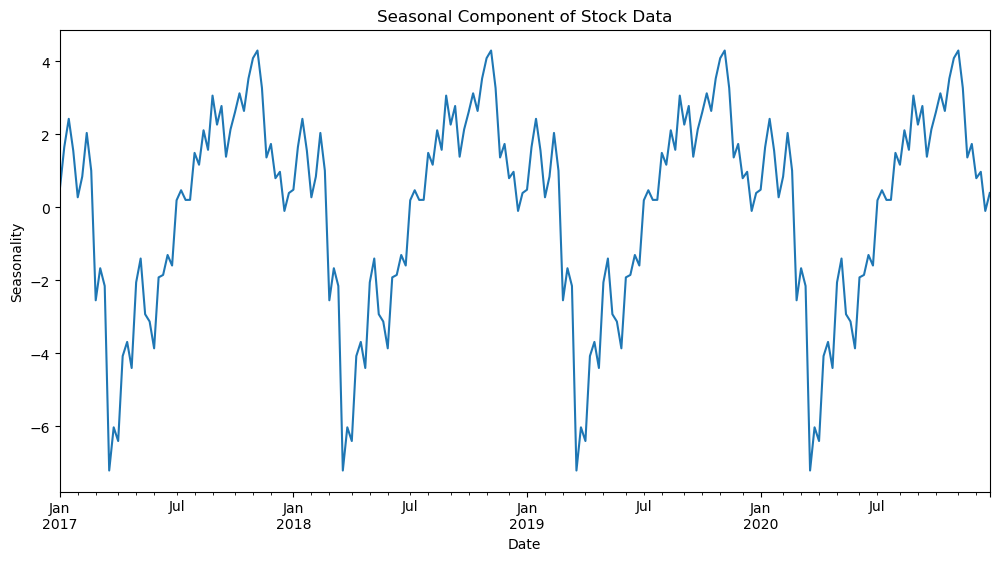

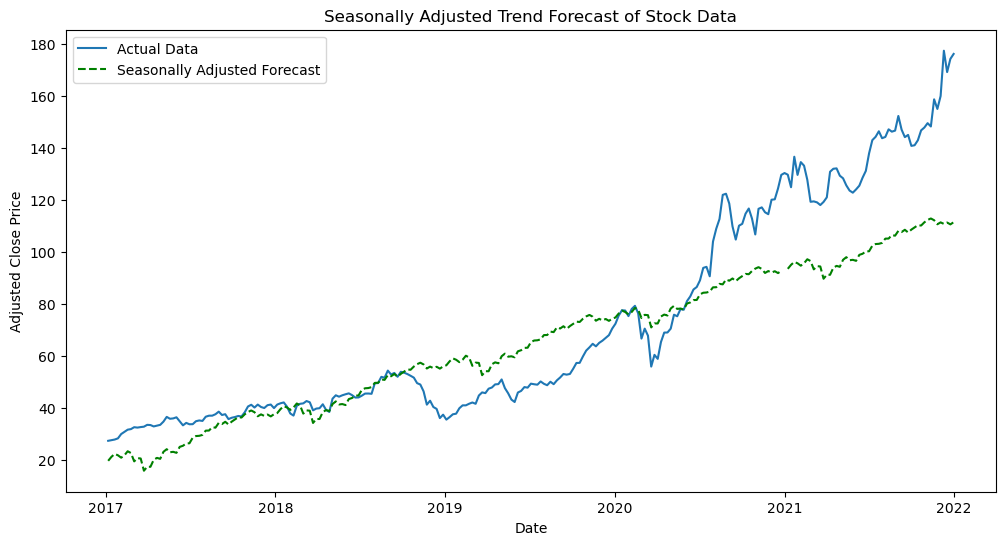

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Extracting the first four years for trend analysis
data_for_trend = stock_data[:'2020-12-31']

# Creating a time index for the regression model
data_for_trend['Time_Index'] = np.arange(len(data_for_trend))

# Linear Regression Model
model = LinearRegression()
model.fit(data_for_trend[['Time_Index']], data_for_trend['Adj Close'])

# Predicting the trend for the entire period (including the fifth year)
all_data_time_index = np.arange(len(stock_data))
stock_data['Trend'] = model.predict(all_data_time_index.reshape(-1, 1))

# Seasonal Decomposition
# Assuming weekly data, let's look for a yearly seasonality (approximately 52 weeks)
decomposition = seasonal_decompose(data_for_trend['Adj Close'], model='additive', period=52)

# Extracting the seasonal component
seasonal_component = decomposition.seasonal

# Plotting the seasonal component
plt.figure(figsize=(12, 6))
seasonal_component.plot(title='Seasonal Component of Stock Data')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.show()

# Calculate seasonality factors for each week
seasonality_factors = seasonal_component.groupby(seasonal_component.index.week).mean()

# Apply seasonality adjustment to the trend forecast
# Map each date in the forecast period to its corresponding seasonality factor
stock_data['Seasonal_Adjustment'] = stock_data.index.week.map(seasonality_factors.to_dict())
stock_data['Trend_Adjusted_Forecast'] = stock_data['Trend'] + stock_data['Seasonal_Adjustment']

# Plotting the seasonally adjusted forecast
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Adj Close'], label='Actual Data')
plt.plot(stock_data['Trend_Adjusted_Forecast'], color='green', linestyle='--', label='Seasonally Adjusted Forecast')
plt.title('Seasonally Adjusted Trend Forecast of Stock Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


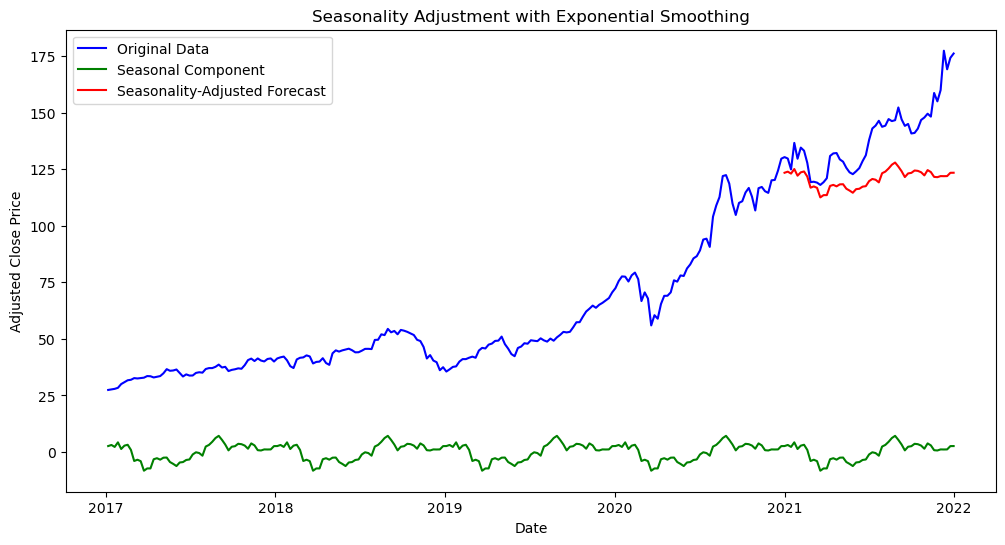

Seasonality-Adjusted Forecast - MAD: 18.22, MAPE: 12.52%, RMSE: 21.71


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming cleaned_weekly_data is already loaded and prepared

# Decompose the time series to extract trend and seasonality
decomposition = seasonal_decompose(cleaned_weekly_data['Adj Close'], model='additive', period=52)
trend_component = decomposition.trend.dropna()
seasonal_component = decomposition.seasonal.dropna()

# Deseasonalize the data by removing the seasonal component
deseasonalized_data = cleaned_weekly_data['Adj Close'] - seasonal_component

# Split data into training and testing sets for the deseasonalized data
train = deseasonalized_data[:'2020-12-31']
test = deseasonalized_data['2021-01-01':]

# Apply Exponential Smoothing to Deseasonalized Data
alpha = 0.3  # Adjust alpha as needed
model = SimpleExpSmoothing(train.dropna()).fit(smoothing_level=alpha, optimized=False)
forecast_length = len(test)
forecast_deseasonalized = model.forecast(forecast_length)

# Re-add the seasonal component to the forecasted values
seasonal_forecast = seasonal_component['2021-01-01':'2021-12-31']  # Adjust dates as needed
adjusted_forecast = forecast_deseasonalized.values + seasonal_forecast.values

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(cleaned_weekly_data['Adj Close'], label='Original Data', color='blue')
plt.plot(seasonal_component, label='Seasonal Component', color='green')
#plt.plot(deseasonalized_data, label='Deseasonalized Data', color='orange')
plt.plot(test.index, adjusted_forecast, label='Seasonality-Adjusted Forecast', color='red')
plt.title('Seasonality Adjustment with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Calculate error metrics for the seasonality-adjusted forecast
mad = mean_absolute_error(test, adjusted_forecast)
mape = np.mean(np.abs((test - adjusted_forecast) / test)) * 100
rmse = np.sqrt(mean_squared_error(test, adjusted_forecast))

print(f'Seasonality-Adjusted Forecast - MAD: {mad:.2f}, MAPE: {mape:.2f}%, RMSE: {rmse:.2f}')


# C. Finally, choose a monthly data set (i.e. only 12 data points per year) from the first 4 years of your data at regular intervals. Then find at least another 10 similar data sets from other sources. For example, if your data set is the peak temperature of a municipality of a city on the 1st day of each month, find another 10 municipalities of the same city that you expect to have similar weather, and collect the corresponding data. Run your best forecasting technique over the 48 point data set to forecast the monthly data for year 5. Then adjust it taking advantage of the other 10 similar data sets and compare.

In [ ]:
monthly_data = cleaned_weekly_data['Adj Close'].resample('M').last()  # Resample to monthly
monthly_train = monthly_data[monthly_data.index.year < 2021]
#monthly_train

In [ ]:
# Microsoft Corporation - MSFT
# Amazon.com, Inc. - AMZN
# Google (Alphabet Inc.) - GOOGL
# Facebook (Meta Platforms, Inc.) - META
# Tesla, Inc. - TSLA
# Berkshire Hathaway Inc. - BRK-B
# Johnson & Johnson - JNJ
# JPMorgan Chase & Co. - JPM
# Visa Inc. - V
# Coca-Cola - KO

ticker_symbols = ['MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'BRK-B', 'JNJ', 'JPM', 'V','KO']

start_time = '2017-01-01'
end_time = '2021-12-31'

# Create a dictionary to store dataframes
stock_dataframes = {}

for ticker in ticker_symbols:
    # Downloading stock data
    stock_data = yf.download(ticker, start=start_time, end=end_time)
    
    # Resample to monthly data and use the last available data of the month
    monthly_data = stock_data['Adj Close'].resample('M').last()
    
    # Store in the dictionary
    stock_dataframes[ticker] = monthly_data


# Adding Apple's stock data to the dictionary
aapl_data = yf.download('AAPL', start=start_time, end=end_time)
monthly_aapl_data = aapl_data['Adj Close'].resample('M').last()
stock_dataframes['AAPL'] = monthly_aapl_data

stock_dataframes['KO']

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming that stock_dataframes is already populated with the resampled monthly data
forecasts = {}

for ticker, data in stock_dataframes.items():
    # Train model on the data (excluding the last 12 months)
    model = ExponentialSmoothing(data.iloc[:-12], trend="additive", seasonal=None, seasonal_periods=12)
    model_fit = model.fit()
    
    # Forecast the next 12 months
    forecast = model_fit.forecast(12)
    forecasts[ticker] = forecast

In [ ]:
# Calculating the average monthly growth rate
avg_growth_rate = np.mean([df.pct_change().mean() for df in stock_dataframes.values()])

# Adjusting forecasts using the average growth rate
adjusted_forecasts = {ticker: forecast * (1 + avg_growth_rate) for ticker, forecast in forecasts.items()}


In [ ]:
# Plotting original and adjusted forecasts
for ticker in ticker_symbols:
    plt.figure(figsize=(10, 4))
    plt.plot(stock_dataframes[ticker].iloc[-24:], label='Actual')
    plt.plot(forecasts[ticker], label='Forecast')
    plt.plot(adjusted_forecasts[ticker], label='Adjusted Forecast')
    plt.title(f'Forecast vs Adjusted Forecast for {ticker}')
    plt.legend()
    plt.show()